In [1]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42
dataset = 'model/train.csv'
model_save_path = 'model/train.hdf5'
tflite_save_path = 'model/train.tflite'
NUM_CLASSES = 3
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 42)                0         
_________________________________________________________________
dense (Dense)                (None, 20)                860       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 1,103
Trainable params: 1,103
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [4]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
6/6 [==============================] - 1s 60ms/step - loss: 1.1576 - accuracy: 0.3275 - val_loss: 1.0621 - val_accuracy: 0.0000e+00

Epoch 00001: saving model to model\train.hdf5
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 1.0602 - accuracy: 0.4464 - val_loss: 0.9887 - val_accuracy: 0.9956

Epoch 00002: saving model to model\train.hdf5
Epoch 3/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.9889 - accuracy: 0.5624 - val_loss: 0.9188 - val_accuracy: 1.0000

Epoch 00003: saving model to model\train.hdf5
Epoch 4/1000
6/6 [==============================] - 0s 16ms/step - loss: 0.9169 - accuracy: 0.6725 - val_loss: 0.8275 - val_accuracy: 1.0000

Epoch 00004: saving model to model\train.hdf5
Epoch 5/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.8209 - accuracy: 0.7797 - val_loss: 0.7213 - val_accuracy: 1.0000

Epoch 00005: saving model to model\train.hdf5
Epoch 6/1000
6/6 [==============================] - 0s 6ms/


Epoch 00044: saving model to model\train.hdf5
Epoch 45/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0325 - accuracy: 0.9956 - val_loss: 0.0014 - val_accuracy: 1.0000

Epoch 00045: saving model to model\train.hdf5
Epoch 46/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0392 - accuracy: 0.9868 - val_loss: 0.0013 - val_accuracy: 1.0000

Epoch 00046: saving model to model\train.hdf5
Epoch 47/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0406 - accuracy: 0.9897 - val_loss: 0.0012 - val_accuracy: 1.0000

Epoch 00047: saving model to model\train.hdf5
Epoch 48/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0289 - accuracy: 0.9971 - val_loss: 0.0011 - val_accuracy: 1.0000

Epoch 00048: saving model to model\train.hdf5
Epoch 49/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0306 - accuracy: 0.9912 - val_loss: 0.0010 - val_accuracy: 1.0000

Epoch 00049: saving model to model\train.hdf5
Epoch 50/1000


Epoch 00087: saving model to model\train.hdf5
Epoch 88/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0122 - accuracy: 0.9985 - val_loss: 8.4332e-05 - val_accuracy: 1.0000

Epoch 00088: saving model to model\train.hdf5
Epoch 89/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0169 - accuracy: 0.9941 - val_loss: 8.0763e-05 - val_accuracy: 1.0000

Epoch 00089: saving model to model\train.hdf5
Epoch 90/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0141 - accuracy: 0.9941 - val_loss: 7.7273e-05 - val_accuracy: 1.0000

Epoch 00090: saving model to model\train.hdf5
Epoch 91/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0122 - accuracy: 0.9985 - val_loss: 7.3447e-05 - val_accuracy: 1.0000

Epoch 00091: saving model to model\train.hdf5
Epoch 92/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0146 - accuracy: 0.9941 - val_loss: 7.0395e-05 - val_accuracy: 1.0000

Epoch 00092: saving model to model\trai

6/6 [==============================] - 0s 9ms/step - loss: 0.0123 - accuracy: 0.9941 - val_loss: 1.4109e-05 - val_accuracy: 1.0000

Epoch 00130: saving model to model\train.hdf5
Epoch 131/1000
6/6 [==============================] - 0s 10ms/step - loss: 0.0078 - accuracy: 0.9971 - val_loss: 1.3714e-05 - val_accuracy: 1.0000

Epoch 00131: saving model to model\train.hdf5
Epoch 132/1000
6/6 [==============================] - 0s 11ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 1.3269e-05 - val_accuracy: 1.0000

Epoch 00132: saving model to model\train.hdf5
Epoch 133/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0144 - accuracy: 0.9956 - val_loss: 1.3092e-05 - val_accuracy: 1.0000

Epoch 00133: saving model to model\train.hdf5
Epoch 134/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0084 - accuracy: 0.9971 - val_loss: 1.2866e-05 - val_accuracy: 1.0000

Epoch 00134: saving model to model\train.hdf5
Epoch 135/1000
6/6 [============================


Epoch 00172: saving model to model\train.hdf5
Epoch 173/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 3.4030e-06 - val_accuracy: 1.0000

Epoch 00173: saving model to model\train.hdf5
Epoch 174/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 3.2659e-06 - val_accuracy: 1.0000

Epoch 00174: saving model to model\train.hdf5
Epoch 175/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9985 - val_loss: 3.1372e-06 - val_accuracy: 1.0000

Epoch 00175: saving model to model\train.hdf5
Epoch 176/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 0.9956 - val_loss: 3.0942e-06 - val_accuracy: 1.0000

Epoch 00176: saving model to model\train.hdf5
Epoch 177/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.0401e-06 - val_accuracy: 1.0000

Epoch 00177: saving model to model

6/6 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.3365e-06 - val_accuracy: 1.0000

Epoch 00215: saving model to model\train.hdf5
Epoch 216/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0080 - accuracy: 0.9985 - val_loss: 1.2950e-06 - val_accuracy: 1.0000

Epoch 00216: saving model to model\train.hdf5
Epoch 217/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 1.3018e-06 - val_accuracy: 1.0000

Epoch 00217: saving model to model\train.hdf5
Epoch 218/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 1.2399e-06 - val_accuracy: 1.0000

Epoch 00218: saving model to model\train.hdf5
Epoch 219/1000
6/6 [==============================] - 0s 7ms/step - loss: 0.0110 - accuracy: 0.9956 - val_loss: 1.2226e-06 - val_accuracy: 1.0000

Epoch 00219: saving model to model\train.hdf5
Epoch 220/1000
6/6 [==============================

6/6 [==============================] - 0s 10ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 4.1434e-07 - val_accuracy: 1.0000

Epoch 00257: saving model to model\train.hdf5
Epoch 258/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0057 - accuracy: 0.9971 - val_loss: 4.2275e-07 - val_accuracy: 1.0000

Epoch 00258: saving model to model\train.hdf5
Epoch 259/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0047 - accuracy: 0.9985 - val_loss: 4.2747e-07 - val_accuracy: 1.0000

Epoch 00259: saving model to model\train.hdf5
Epoch 260/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0069 - accuracy: 0.9956 - val_loss: 4.3010e-07 - val_accuracy: 1.0000

Epoch 00260: saving model to model\train.hdf5
Epoch 261/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.2800e-07 - val_accuracy: 1.0000

Epoch 00261: saving model to model\train.hdf5
Epoch 262/1000
6/6 [=============================


Epoch 00299: saving model to model\train.hdf5
Epoch 300/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 2.3999e-07 - val_accuracy: 1.0000

Epoch 00300: saving model to model\train.hdf5
Epoch 301/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0051 - accuracy: 0.9971 - val_loss: 2.3789e-07 - val_accuracy: 1.0000

Epoch 00301: saving model to model\train.hdf5
Epoch 302/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0077 - accuracy: 0.9985 - val_loss: 2.3737e-07 - val_accuracy: 1.0000

Epoch 00302: saving model to model\train.hdf5
Epoch 303/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 2.3159e-07 - val_accuracy: 1.0000

Epoch 00303: saving model to model\train.hdf5
Epoch 304/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0055 - accuracy: 0.9985 - val_loss: 2.2056e-07 - val_accuracy: 1.0000

Epoch 00304: saving model to model

6/6 [==============================] - 0s 7ms/step - loss: 0.0032 - accuracy: 0.9985 - val_loss: 8.8225e-08 - val_accuracy: 1.0000

Epoch 00342: saving model to model\train.hdf5
Epoch 343/1000
6/6 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 8.8225e-08 - val_accuracy: 1.0000

Epoch 00343: saving model to model\train.hdf5
Epoch 344/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0058 - accuracy: 0.9985 - val_loss: 8.1924e-08 - val_accuracy: 1.0000

Epoch 00344: saving model to model\train.hdf5
Epoch 345/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 7.6672e-08 - val_accuracy: 1.0000

Epoch 00345: saving model to model\train.hdf5
Epoch 346/1000
6/6 [==============================] - 0s 6ms/step - loss: 0.0040 - accuracy: 0.9985 - val_loss: 6.6169e-08 - val_accuracy: 1.0000

Epoch 00346: saving model to model\train.hdf5
Epoch 347/1000
6/6 [==============================

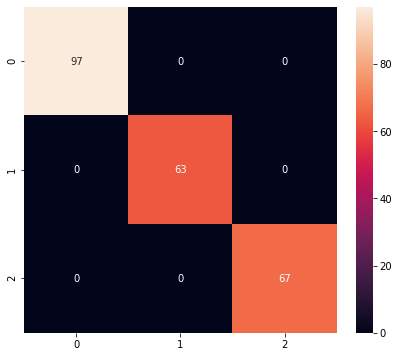

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00        63
           2       1.00      1.00      1.00        67

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


In [7]:
model.save(model_save_path, include_optimizer=False)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO:tensorflow:Assets written to: C:\Users\TIENDA~1\AppData\Local\Temp\tmpto7m25ao\assets
